<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Selenium" data-toc-modified-id="Selenium-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Selenium</a></span><ul class="toc-item"><li><span><a href="#Installing-Python-bindings-for-Selenium" data-toc-modified-id="Installing-Python-bindings-for-Selenium-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Installing Python bindings for Selenium</a></span></li></ul></li><li><span><a href="#Let's-go-with-the-code" data-toc-modified-id="Let's-go-with-the-code-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Let's go with the code</a></span><ul class="toc-item"><li><span><a href="#Options" data-toc-modified-id="Options-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Options</a></span></li><li><span><a href="#Get-data-using-selenium" data-toc-modified-id="Get-data-using-selenium-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Get data using selenium</a></span><ul class="toc-item"><li><span><a href="#Locating-elements-with-selenium" data-toc-modified-id="Locating-elements-with-selenium-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Locating elements with selenium</a></span></li><li><span><a href="#Create-the-dataframe" data-toc-modified-id="Create-the-dataframe-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Create the dataframe</a></span></li></ul></li><li><span><a href="#Now,-is-your-turn" data-toc-modified-id="Now,-is-your-turn-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Now, is your turn</a></span></li></ul></li></ul></div>

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
import pandas as pd
from selenium.webdriver.support.ui import Select
from webdriver_manager.chrome import ChromeDriverManager

# Selenium 

[Selenium documentation](https://selenium-python.readthedocs.io/)

## Installing Python bindings for Selenium

```python
pip install selenium
````



# Let's go with the code

The Chromeoptions Class allow us manipulate various properties of the Chrome driver. The Chrome options class is generally used in conjunction with Desired Capabilities for customizing Chrome driver sessions. It helps you perform various operations like opening Chrome in maximized mode, disable existing extensions, disable pop-ups, etc.


## Options

In [ ]:
opciones=Options()

opciones.add_experimental_option('excludeSwitches', ['enable-automation'])
opciones.add_experimental_option('useAutomationExtension', False)

opciones.headless=False    # si True, no aperece la ventana (headless=no visible)

oones.add_argument('--start-maximized')         # comienza maximizado

opciones.add_argument('user-data-dir=selenium')    # mantiene las cookies

#opciones.add_extension('driver_folder/adblock.crx')       # adblocker

opciones.add_argument('--incognito')              # incognito

## Get data using selenium 

### Locating elements with selenium

- To find one element 

```python
find_element_by_id
find_element_by_name
find_element_by_xpath
find_element_by_link_text
find_element_by_partial_link_text
find_element_by_tag_name
find_element_by_class_name
find_element_by_css_selector
```
- To find multiple elements (these methods will return a list):

```python
find_elements_by_name
find_elements_by_xpath
find_elements_by_link_text
find_elements_by_partial_link_text
find_elements_by_tag_name
find_elements_by_class_name
find_elements_by_css_selector
```

- Other important method we normally use in selenium

```python
.click() # will simulate the click in the browser
.send_keys # is going to fill in a field, e.g. a search engine
.implicitly_wait # directs the Selenium WebDriver to wait for a certain measure of time before throwing an exception. Once this time is set, WebDriver will wait for the element before the exception occurs.
.text # get the text of the selenium element
```

In [ ]:
# download the driver 
driver = webdriver.Chrome(ChromeDriverManager().install(), options = opciones)

# set the url
url2 = "https://www.zooplus.es/"

# request the url
driver.get(url2)

driver.implicitly_wait(2) # is like a time.sleep but specific of selenium

driver.find_element_by_css_selector("#onetrust-accept-btn-handler").click()
driver.find_element_by_css_selector("#search_query_field").send_keys("rascadores")
driver.implicitly_wait(2)
driver.find_element_by_css_selector("#shop_search_top_submit > span").click()

precio = []
producto = []
descripcion = []

for i in range(1,19):
    try: 
        precio.append(driver.find_element_by_css_selector(f"#page-content > div.MuiGrid-root.MuiGrid-container.MuiGrid-spacing-xs-2.MuiGrid-justify-xs-space-between > main > div.sc-bTfYFJ.gmPofz > div:nth-child({i}) > div > div > div.MuiGrid-root.product-variant.MuiGrid-item.MuiGrid-grid-xs-12.MuiGrid-grid-xl-9 > div.sc-fKVqWL.jiYkEj.product__list__detail-variants > div > div > div.sc-iUKqMP.bdZTHW.product__prices_col > small").text)
        producto.append(driver.find_element_by_css_selector(f"#page-content > div.MuiGrid-root.MuiGrid-container.MuiGrid-spacing-xs-2.MuiGrid-justify-xs-space-between > main > div.sc-bTfYFJ.gmPofz > div:nth-child({i}) > div > div > div.MuiGrid-root.MuiGrid-item.MuiGrid-grid-xs-8.MuiGrid-grid-sm-9 > div.sc-dvQaRk.gRaLaQ > h3").text)
        descripcion.append(driver.find_element_by_css_selector(f"#page-content > div.MuiGrid-root.MuiGrid-container.MuiGrid-spacing-xs-2.MuiGrid-justify-xs-space-between > main > div.sc-bTfYFJ.gmPofz > div:nth-child({i}) > div > div > div.MuiGrid-root.MuiGrid-item.MuiGrid-grid-xs-8.MuiGrid-grid-sm-9 > p").text)
    except: 
        precio.append(driver.find_element_by_css_selector(f"#page-content > div.MuiGrid-root.MuiGrid-container.MuiGrid-spacing-xs-2.MuiGrid-justify-xs-space-between > main > div.sc-bTfYFJ.gmPofz > div:nth-child({i}) > div > div > div.MuiGrid-root.product-variant.MuiGrid-item.MuiGrid-grid-xs-12.MuiGrid-grid-xl-9 > div.sc-fKVqWL.jiYkEj.product__list__detail-variants > div > div > div.sc-iUKqMP.bdZTHW.product__prices_col > span").text)
        producto.append(driver.find_element_by_css_selector(f"#page-content > div.MuiGrid-root.MuiGrid-container.MuiGrid-spacing-xs-2.MuiGrid-justify-xs-space-between > main > div.sc-bTfYFJ.gmPofz > div:nth-child({i}) > div > div > div.MuiGrid-root.MuiGrid-item.MuiGrid-grid-xs-8.MuiGrid-grid-sm-9 > div.sc-dvQaRk.gRaLaQ > h3").text)
        descripcion.append(driver.find_element_by_css_selector(f"#page-content > div.MuiGrid-root.MuiGrid-container.MuiGrid-spacing-xs-2.MuiGrid-justify-xs-space-between > main > div.sc-bTfYFJ.gmPofz > div:nth-child({i}) > div > div > div.MuiGrid-root.MuiGrid-item.MuiGrid-grid-xs-8.MuiGrid-grid-sm-9 > p").text)
    else:
        precio.append(driver.find_element_by_css_selector(f"#page-content > div.MuiGrid-root.MuiGrid-container.MuiGrid-spacing-xs-2.MuiGrid-justify-xs-space-between > main > div.sc-bTfYFJ.gmPofz > div:nth-child({i}) > div > div > div.MuiGrid-root.product-variant.MuiGrid-item.MuiGrid-grid-xs-12.MuiGrid-grid-xl-9 > div.sc-fKVqWL.jiYkEj.product__list__detail-variants > div > div:nth-child(1) > div.sc-iUKqMP.bdZTHW.product__prices_col > small").text)
#driver.quit()

### Create the dataframe

In [ ]:
df = pd.DataFrame( producto, descripcion).reset_index()
df["precio"] = precio[:18]
df.columns = ["Descripción", "producto", "precio"]
df.head()

In [ ]:
df.to_csv("../data/zooplus.csv")

## Now, is your turn

**Using this page** 👇🏽 


https://www.wunderground.com/history/monthly/EHAM/date

We want you to extract all the information from the year 2014 to 2021 from the tables below


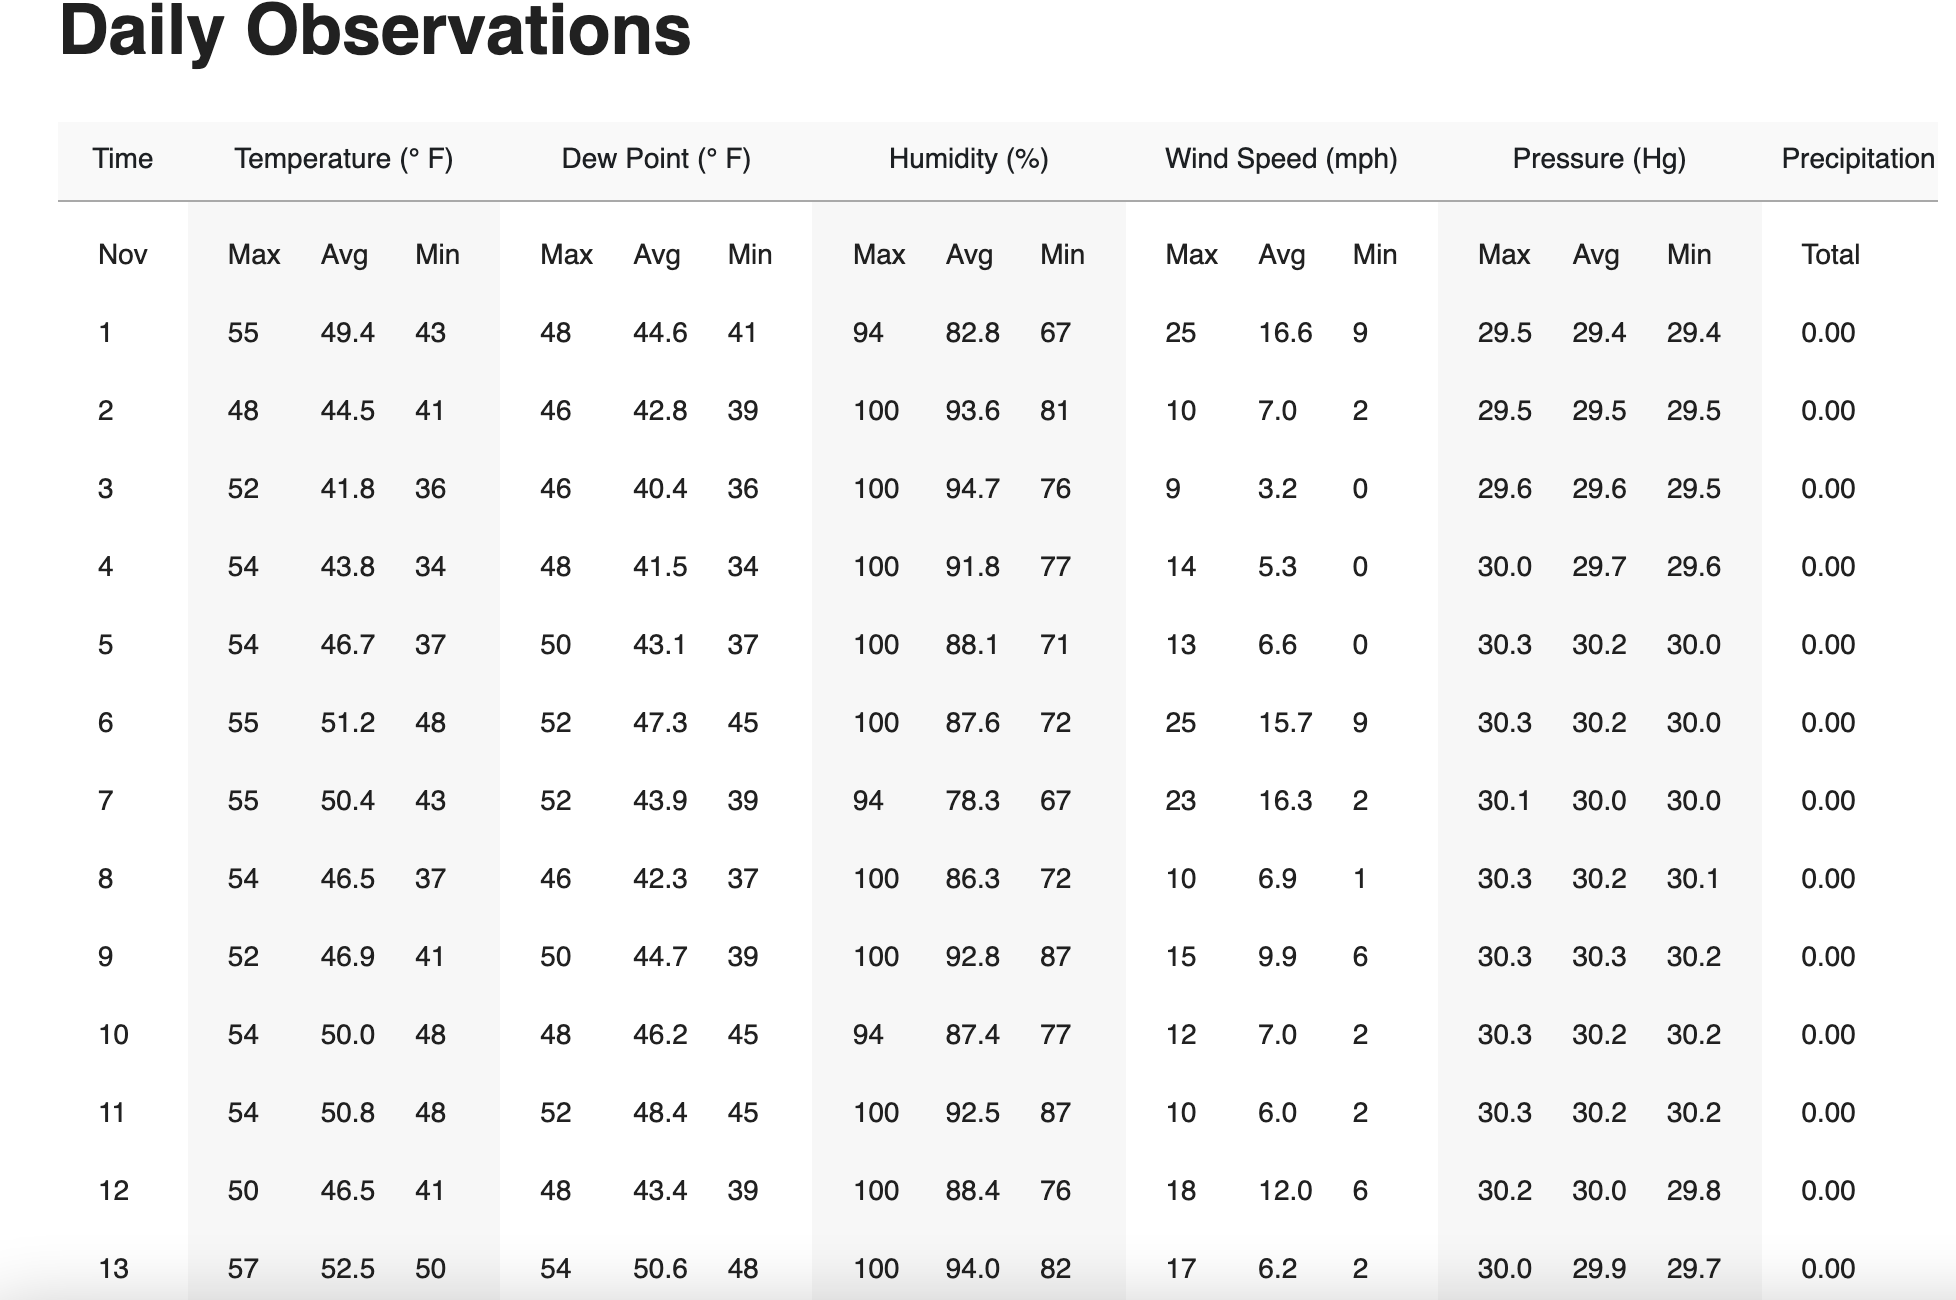